Importing necessary modules

In [1]:
import matplotlib.pyplot as plt
import support_file as sf
import seaborn as sns
import pandas as pd
import numpy as np


   HIGH  MEDIUM  LOW
0     0       1    0
1     0       0    1
2     0       0    1
3     1       0    0
4     0       1    0


Importing the data and making new dataframe data_num

In [2]:
data = pd.read_csv("Ecommerce Customers.csv")

data_num = data[["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent"]]

data_cat = data[["Email","Address"]]


In [3]:
#data_num.head(5)

In [4]:
#data_num.shape

Measurment calculator 


In [5]:
#transform inch in cm
def cm_to_inch(value):
    return value/2.54
cm_to_inch(100)

39.37007874015748

Import numerical und categorical variables in one dataframe

In [42]:
data_hot_clustering = sf.data_hot_clustering
#data_hot_clustering = pd.concat([data_norm, dummies], axis=1)

data_hot_clustering = data_hot_clustering[["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent","State group", "State"]]

In [43]:
data_hot_clustering.head(10)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,State group,State
0,34.497268,12.655651,39.577668,4.082621,587.951054,MEDIUM,MI
1,31.926272,11.109461,37.268959,2.664034,392.204933,LOW,CA
2,34.305557,13.717514,36.721283,3.120179,581.852344,LOW,OH
3,33.871038,12.026925,34.476878,5.493507,637.102448,HIGH,MN
4,32.021596,11.366348,36.683776,4.685017,521.572175,MEDIUM,WV
5,33.987773,13.386235,37.534497,3.273434,570.200409,LOW,SD
6,33.992573,13.338975,37.225806,2.482608,492.606013,LOW,WY
7,29.532429,10.961298,37.420216,4.046423,408.640351,HIGH,MO
8,32.387976,13.148726,36.619957,2.494544,470.452733,MEDIUM,ND
9,30.737720,12.636606,36.213763,3.357847,461.780742,LOW,OH


In [9]:
%run pandas_analysis.ipynb

DriverError: cb_2016_us_state_5m\cb_2016_us_state_5m.shp: No such file or directory

Univariate visual data analysis 

In [78]:
counter=["Avg. Session Length","Time on App","Time on Website"]

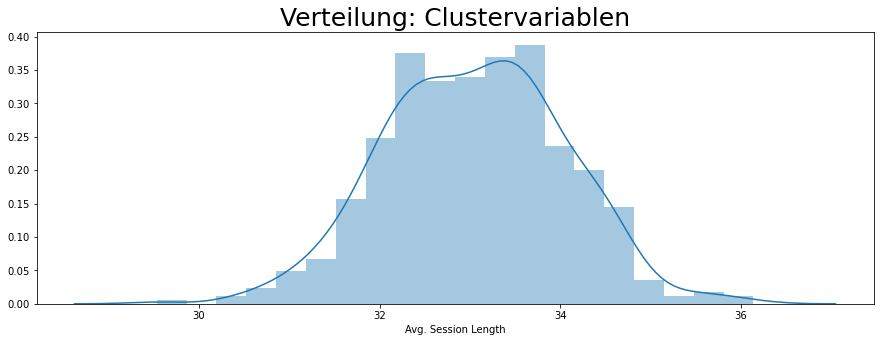

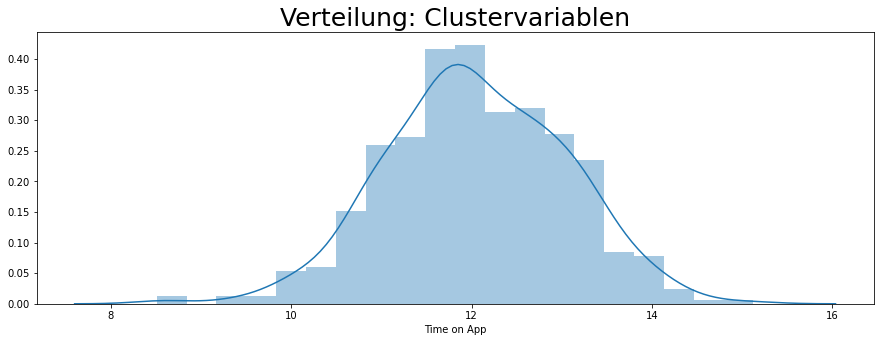

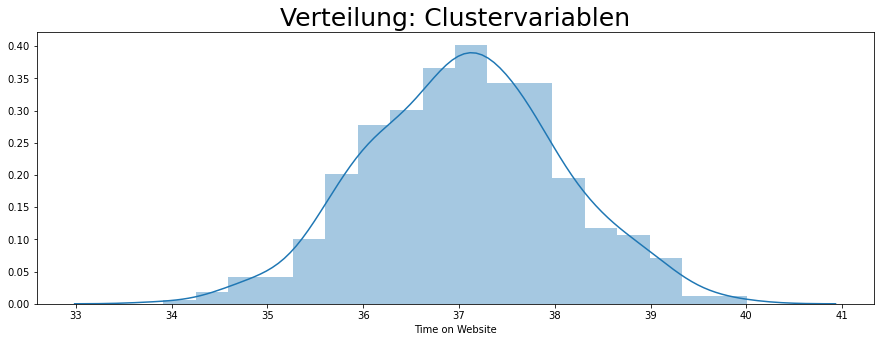

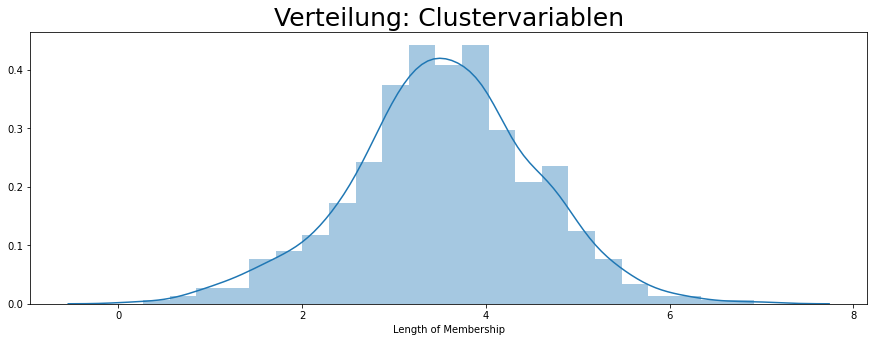

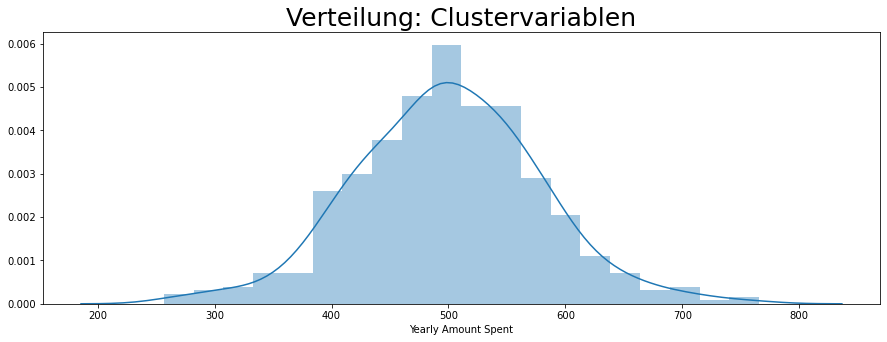

In [45]:
#Distributionplots 
def distplot(x):
    for i in x:
        fig = plt.figure(2, figsize=(15,5))
        sns.distplot(x[i], kde=True)
        plt.title('Verteilung: Clustervariablen', fontsize=25)
        plt.show()

distplot(data_num)

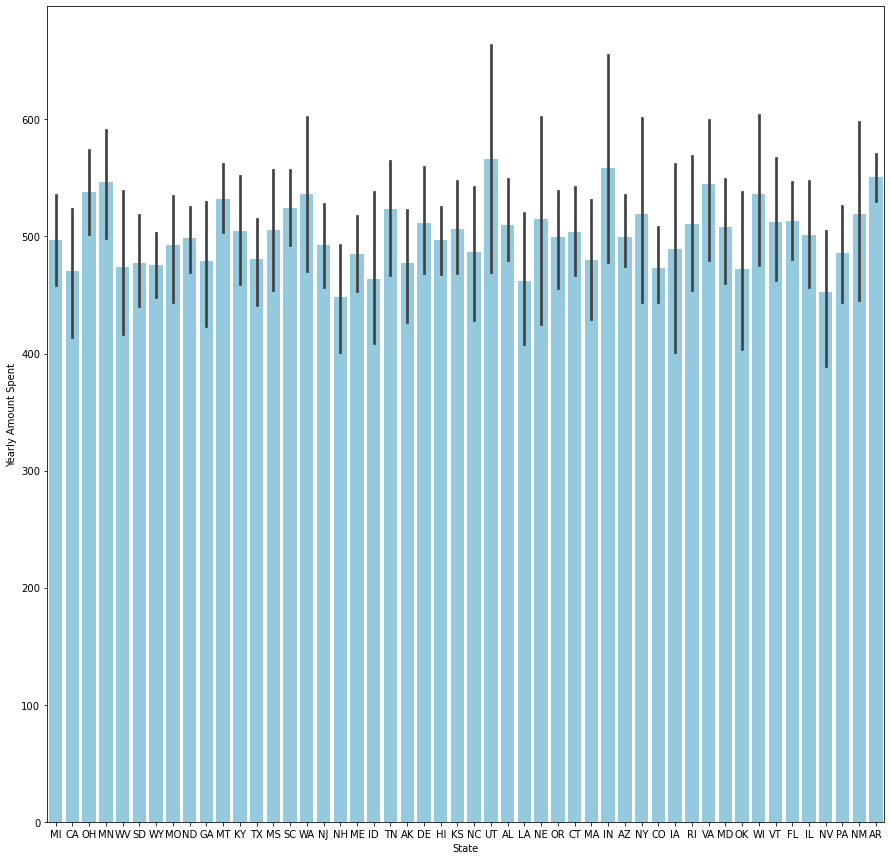

In [44]:
fig = plt.figure(2, figsize=(15,15))
ax = fig.add_subplot()
sns.barplot(x=data_mixed['State'], y=data_mixed['Yearly Amount Spent'], color='skyblue')

In [17]:
def cm_to_inch(value):
    return value/2.54
cm_to_inch(30)

11.811023622047244

In [18]:
data_mixed['Time on App']

0      12.655651
1      11.109461
2      13.717514
3      12.026925
4      11.366348
         ...    
388    13.566160
389    11.695736
390    11.499409
391    12.391423
392    12.418808
Name: Time on App, Length: 393, dtype: float64

In [19]:
x_list=[]

for i in data_mixed["State"]
    print(data_mixed['Time on App'])
    


SyntaxError: invalid syntax (<ipython-input-19-63e5a0cc4c0b>, line 3)

No handles with labels found to put in legend.


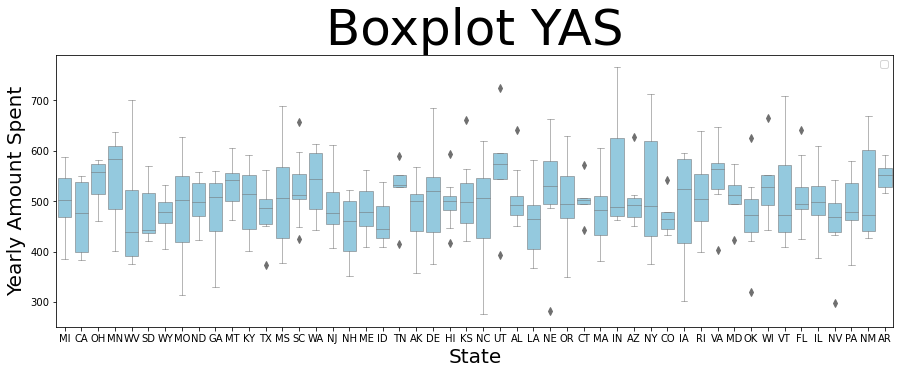

In [52]:
fig = plt.figure(1, figsize=(15,5))
ax = fig.add_subplot()


ax= sns.boxplot(x=data_hot_clustering['State'], y=data_hot_clustering['Yearly Amount Spent'], width=0.8, linewidth=0.5, fliersize=5,color="skyblue" )
plt.xlabel('State',fontsize=20)
plt.ylabel('Yearly Amount Spent', fontsize=20)
plt.title('Boxplot YAS', fontsize=50)
plt.legend() #in abhängigkeit der A bweichugn zum Median)
plt.show()




In [21]:
#x_list

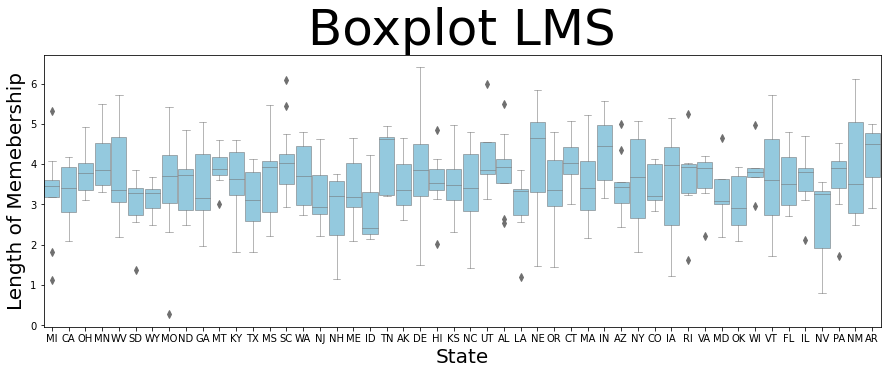

In [53]:
fig = plt.figure(2, figsize=(15,5))
ax = fig.add_subplot()

sns.boxplot(x=data_hot_clustering['State'], y=data_hot_clustering['Length of Membership'],width=0.9, linewidth=0.5, fliersize=5,color="skyblue")
plt.xlabel('State',fontsize=20)
plt.ylabel('Length of Memebership', fontsize=20)
plt.title('Boxplot LMS', fontsize=50)
plt.show()


No handles with labels found to put in legend.


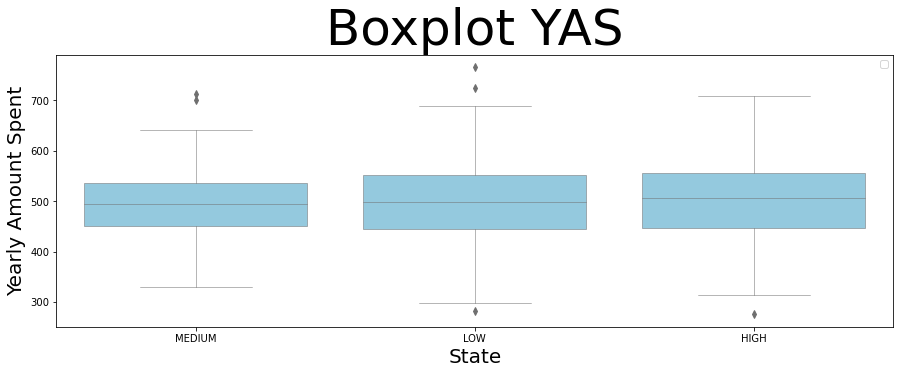

In [62]:
fig = plt.figure(3, figsize=(15,5))
ax = fig.add_subplot()


ax= sns.boxplot(x=data_hot_clustering['State group'], y=data_hot_clustering['Yearly Amount Spent'], width=0.8, linewidth=0.5, fliersize=5,color="skyblue" )
plt.xlabel('State',fontsize=20)
plt.ylabel('Yearly Amount Spent', fontsize=20)
plt.title('Boxplot YAS', fontsize=50)
plt.legend() #in abhängigkeit der A bweichugn zum Median)
plt.show()



#Gruppe "Low" im Vergleich zu "Medium" : Bundessstaaten mit weniger Kunden aber 50 % der Personen geben Geld in einer breiteren Spanne aus - Zusammenhang? Schlussfolgerung? 


No handles with labels found to put in legend.


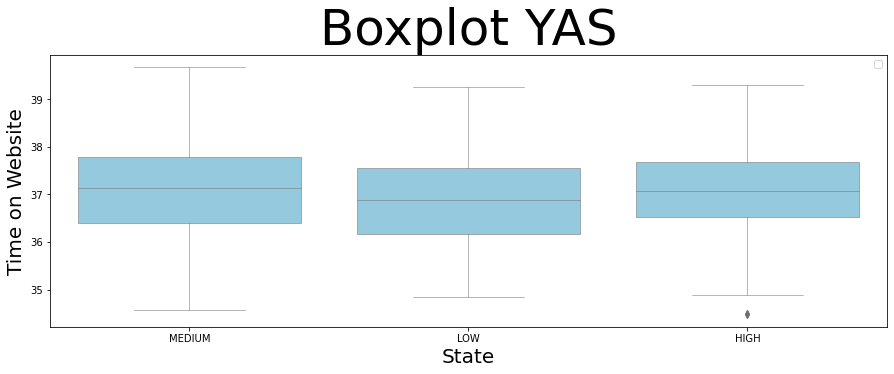

In [72]:
fig = plt.figure(4, figsize=(15,5))
ax = fig.add_subplot()


ax= sns.boxplot(x=data_hot_clustering['State group'], y=data_hot_clustering['Time on Website'], width=0.8, linewidth=0.5, fliersize=5,color="skyblue" )
plt.xlabel('State',fontsize=20)
plt.ylabel('Time on Website', fontsize=20)
plt.title('Boxplot YAS', fontsize=50)
plt.legend() #in abhängigkeit der A bweichugn zum Median)
plt.show()


#Generell Webiste längere Zeiten: Median bei 37
#In den _Bundestatten in denen weniger Kunden sind -> Median geringer und 50% der Kunden sind in kürzer Zeitspanne auf Website; Zusammenhang? Umkehrschluss: in den Bundestaaten in denen wir mehr Kunden haben sind 50% der Kunden auch länger auf der Website SIEHE VERGLEICH ZU TIME ON APP

No handles with labels found to put in legend.


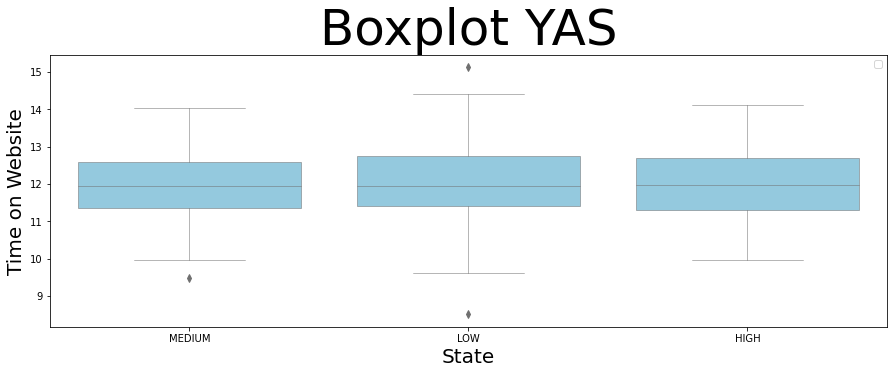

In [74]:
fig = plt.figure(5, figsize=(15,5))
ax = fig.add_subplot()

ax= sns.boxplot(x=data_hot_clustering['State group'], y=data_hot_clustering['Time on App'], width=0.8, linewidth=0.5, fliersize=5,color="skyblue" )
plt.xlabel('State',fontsize=20)
plt.ylabel('Time on Website', fontsize=20)
plt.title('Boxplot YAS', fontsize=50)
plt.legend() #in abhängigkeit der A bweichugn zum Median)
plt.show()



#Generell App niedrigere Zeiten: median bei 12 
#In den _Bundestatten in denen weniger Kunden "LOW" Median ähnlich zu anderen Gruppen; aber 50 % der Kunden in "LOW" sind in längere Zeitspanne auf der App


No handles with labels found to put in legend.


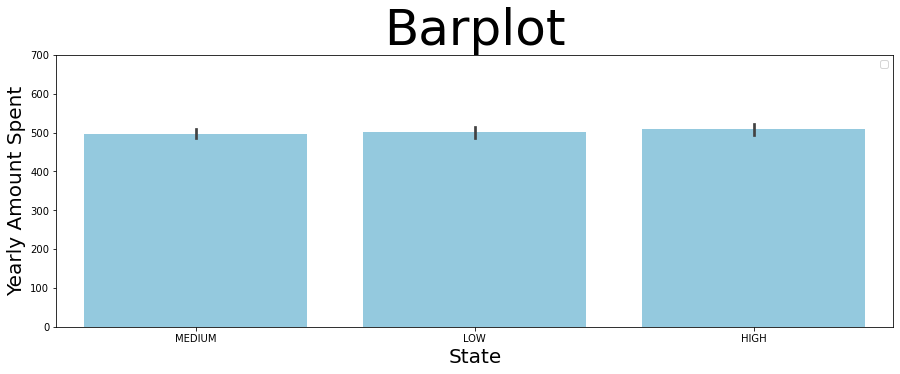

In [91]:
fig = plt.figure(5, figsize=(15,5))
ax = fig.add_subplot()

ax= sns.barplot(x=data_hot_clustering['State group'], y=data_hot_clustering['Yearly Amount Spent'], linewidth=0.5, color="skyblue" )
plt.xlabel('State',fontsize=20)
plt.ylabel('Yearly Amount Spent', fontsize=20)
plt.ylim(0,700)
plt.title('Barplot', fontsize=50)
plt.legend() #in Abhängigkeit der A bweichugn zum Median)
plt.show()

Multivariate visual data analysis 

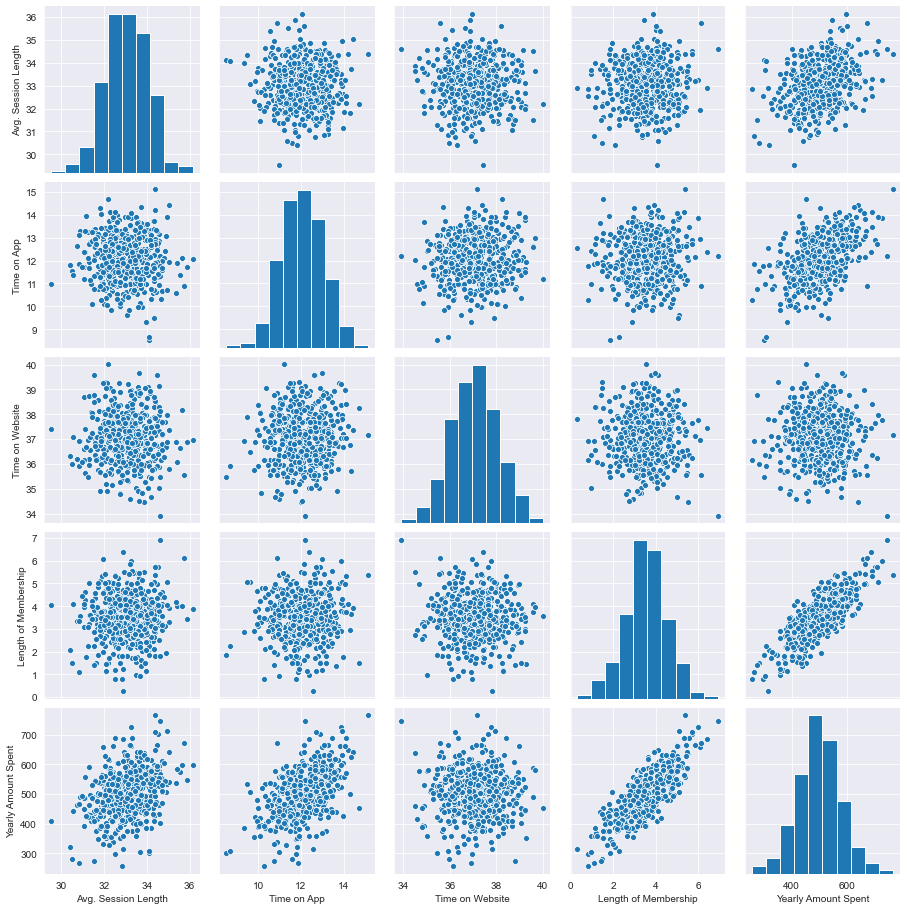

In [79]:
# Overviewing relationships across the entire data frame 
def pairplot_def(x):
    sns.pairplot(x)
    plt.show()

pairplot_def(data_num)

 Bivariate visual data analysis 

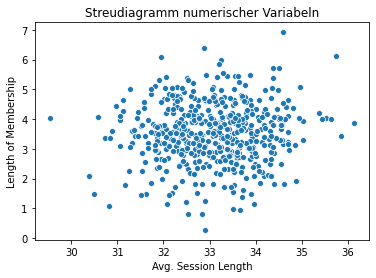

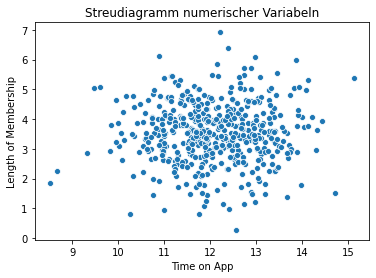

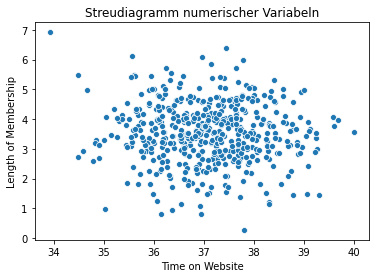

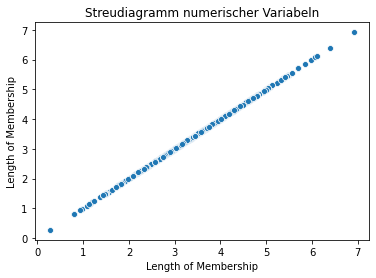

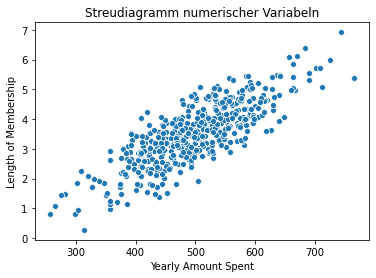

In [14]:
#Scatterplot numerischer V zu Avg. Session Length
def scatter (x):
    plt.figure()
    for i in x:
        sns.scatterplot(x=i, y=data_num["Length of Membership"], data=x)
        plt.title('Streudiagramm numerischer Variabeln')
        plt.show()

scatter(data_num)

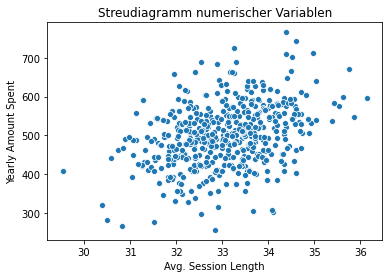

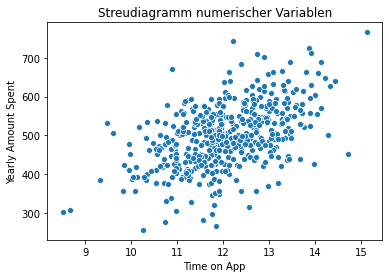

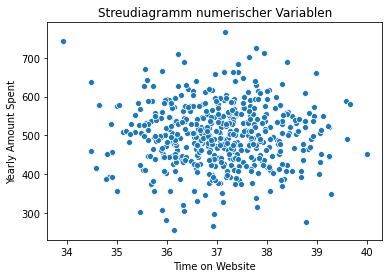

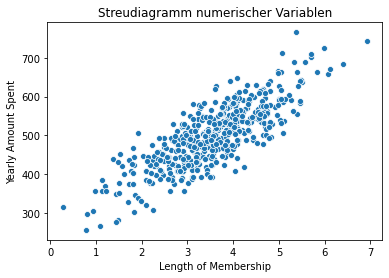

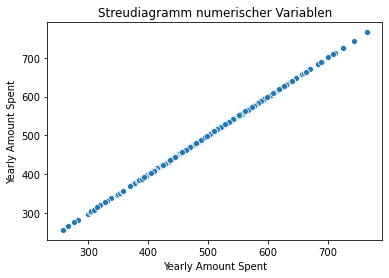

In [15]:
#Scatterplot numerischer V zu Yearly Amount Spent
def scatter2 (x):
    for i in x:
        sns.scatterplot(x=i, y=data_num["Yearly Amount Spent"], data=x)
        plt.title('Streudiagramm numerischer Variablen')
        plt.show()

scatter2 (data_num)